In [ ]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings(action='ignore')

In [ ]:
plt.style.use('ggplot')
# plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# 1. Data 

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 

< y > 
* **Price** : The price of the used car in INR Lakhs.



< X > 
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [ ]:
# Load Data 
data = pd.read_csv("data.csv")
data

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


## 1-1. Data and Target

In [ ]:
data.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

데이터 내 nan값이 상당히 많다는 것을 확인할 수 있다. 총 6019의 데이터 중, 5195개나 nan값인 NEW_PRICE와 의미가 없는 Unnamed 열은 빠르게 삭제하도록 한다. 

In [ ]:
data.drop(['Unnamed: 0', 'New_Price'], axis='columns', inplace=True)

In [ ]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


나머지 nan을 포함한 행은 모두 버린다. 

In [ ]:
data = data.dropna()
data.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

단위가 통일되어있는 Engine과 Power와 Mileage는 단위를 삭제하고 숫자만 남긴다. 

In [ ]:
import re

data['Mileage'] = pd.Series([float(re.sub('[a-zA-Z/ ]', '', 
    str(val))) for val in data['Mileage']], index = data.index)


data['Engine'] = pd.Series([float(re.sub('[a-zA-Z/ ]', '', 
    str(val))) for val in data['Engine']], index = data.index)

In [ ]:
data = data.dropna()
data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [ ]:
for i,d in enumerate(data['Power']):
    print(i, d)    

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
975 103.6 bhp
976 94 bhp
977 98.59 bhp
978 94 bhp
979 190 bhp
980 67.1 bhp
981 174.33 bhp
982 57.5 bhp
983 125 bhp
984 215 bhp
985 98.6 bhp
986 88.5 bhp
987 81.80 bhp
988 170 bhp
989 67 bhp
990 120.7 bhp
991 62 bhp
992 74 bhp
993 82 bhp
994 97.7 bhp
995 66.1 bhp
996 53.3 bhp
997 121.4 bhp
998 67 bhp
999 184 bhp
1000 177 bhp
1001 69.01 bhp
1002 88.73 bhp
1003 34.2 bhp
1004 74 bhp
1005 98.96 bhp
1006 86.8 bhp
1007 147.8 bhp
1008 120 bhp
1009 80 bhp
1010 126.32 bhp
1011 140 bhp
1012 108.5 bhp
1013 74 bhp
1014 88.8 bhp
1015 74 bhp
1016 73.9 bhp
1017 118 bhp
1018 90 bhp
1019 118 bhp
1020 57.6 bhp
1021 62.1 bhp
1022 138.1 bhp
1023 254.8 bhp
1024 235 bhp
1025 174.5 bhp
1026 150 bhp
1027 108.45 bhp
1028 71 bhp
1029 170 bhp
1030 215 bhp
1031 75 bhp
1032 187.7 bhp
1033 308 bhp
1034 160 bhp
1035 152 bhp
1036 85.8 bhp
1037 71 bhp
1038 108.5 bhp
1039 187.74 bhp
1040 82 bhp
1041 100.6 bhp
1042 80 bhp
1043 98.59 bhp
1044 118 bhp
1045 121.36 bhp
1046 73.9 bhp
1047 1

동일하게 Power에도 시도하였으나, 오류가 나서 전체를 프린트해본 결과, dropna를 했음에도 null값이 남아있었다. 이것들은 모두 0으로 대체하였다. 

In [ ]:
power = []
for i,d in enumerate(data['Power']):
    try: power.append(float(re.sub('[a-zA-Z ]', '', str(d))))
    except: power.append(0)

data['Power'] = pd.Series(power, index = data.index)

- Fuel_Type : {0:Petrol, 1:Diesel, 2:Electric, 3:CNG, 4:LPG}
- Transmission : {0:Automatic , 1:Manual}
- Owner_Type : {1:Firsthand, 2:Second hand ,3: other}

위의 값들도 사용하기 위해 수치로 변환했다. 

In [ ]:
dic = {'Automatic':0,'Manual':1}
data['Transmission'] = data['Transmission'].apply(lambda x:dic[x])

dic2 = {'Petrol':0, 'Diesel':1, 'Electric':2, 'CNG':3, 'LPG':4}
data['Fuel_Type'] = data['Fuel_Type'].apply(lambda x:dic2[x])

dic3 = {'First':1, 'Second':2 ,'Third':3, 'Fourth & Above':4}
data['Owner_Type'] = data['Owner_Type'].apply(lambda x:dic3[x])

In [ ]:
data.describe()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
count,5975.000000,5.975000e+03,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000
mean,2013.386778,5.867431e+04,0.569540,0.713975,1.200669,18.179408,1621.606695,111.324171,5.278828,9.501647
std,3.247238,9.155851e+04,0.567041,0.451939,0.453458,4.521801,601.036987,55.413209,0.808959,11.205736
min,1998.000000,1.710000e+02,0.000000,0.000000,1.000000,0.000000,624.000000,0.000000,0.000000,0.440000
25%,2012.000000,3.390800e+04,0.000000,0.000000,1.000000,15.200000,1198.000000,74.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,1.000000,1.000000,1.000000,18.160000,1493.000000,92.700000,5.000000,5.650000
75%,2016.000000,7.300000e+04,1.000000,1.000000,1.000000,21.100000,1984.000000,138.100000,5.000000,9.950000
max,2019.000000,6.500000e+06,4.000000,1.000000,4.000000,33.540000,5998.000000,560.000000,10.000000,160.000000


다음으로는 우리의 타겟값인 Price를 살펴본다. 

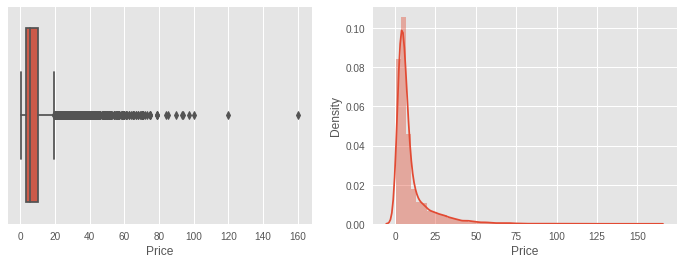

In [ ]:
figure, (ax1, ax2) = plt.subplots(ncols=2)
figure.set_size_inches(12,4)

sns.boxplot(data["Price"], ax=ax1)
sns.distplot(data["Price"],ax=ax2)

굉장히 치우쳐져있다는 것을 확인할 수 있다. 따라서 log transform을 수행한다. 

In [ ]:
data['log_Price'] = data['Price'].map(np.log1p) #feature1

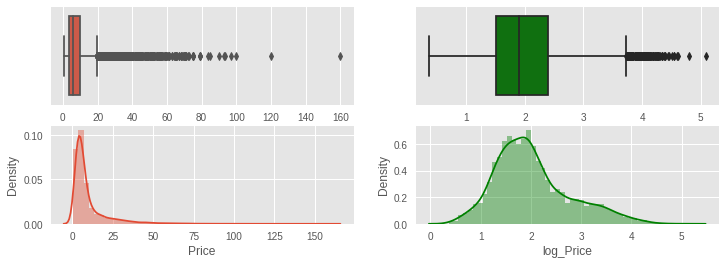

In [ ]:
figure, (ax1, ax2) = plt.subplots(ncols=2, nrows=2)
figure.set_size_inches(12,4)

sns.boxplot(data["Price"], ax=ax1[0])
sns.boxplot(data["log_Price"], ax=ax1[1],color='g')
sns.distplot(data["Price"],ax=ax2[0])
sns.distplot(data["log_Price"],ax=ax2[1], color='g')

In [ ]:
# 필요없어졌으므로 드랍한다. 
data.drop(['Price'], axis='columns', inplace=True)

# 2. 선형성 및 상관관계 분석

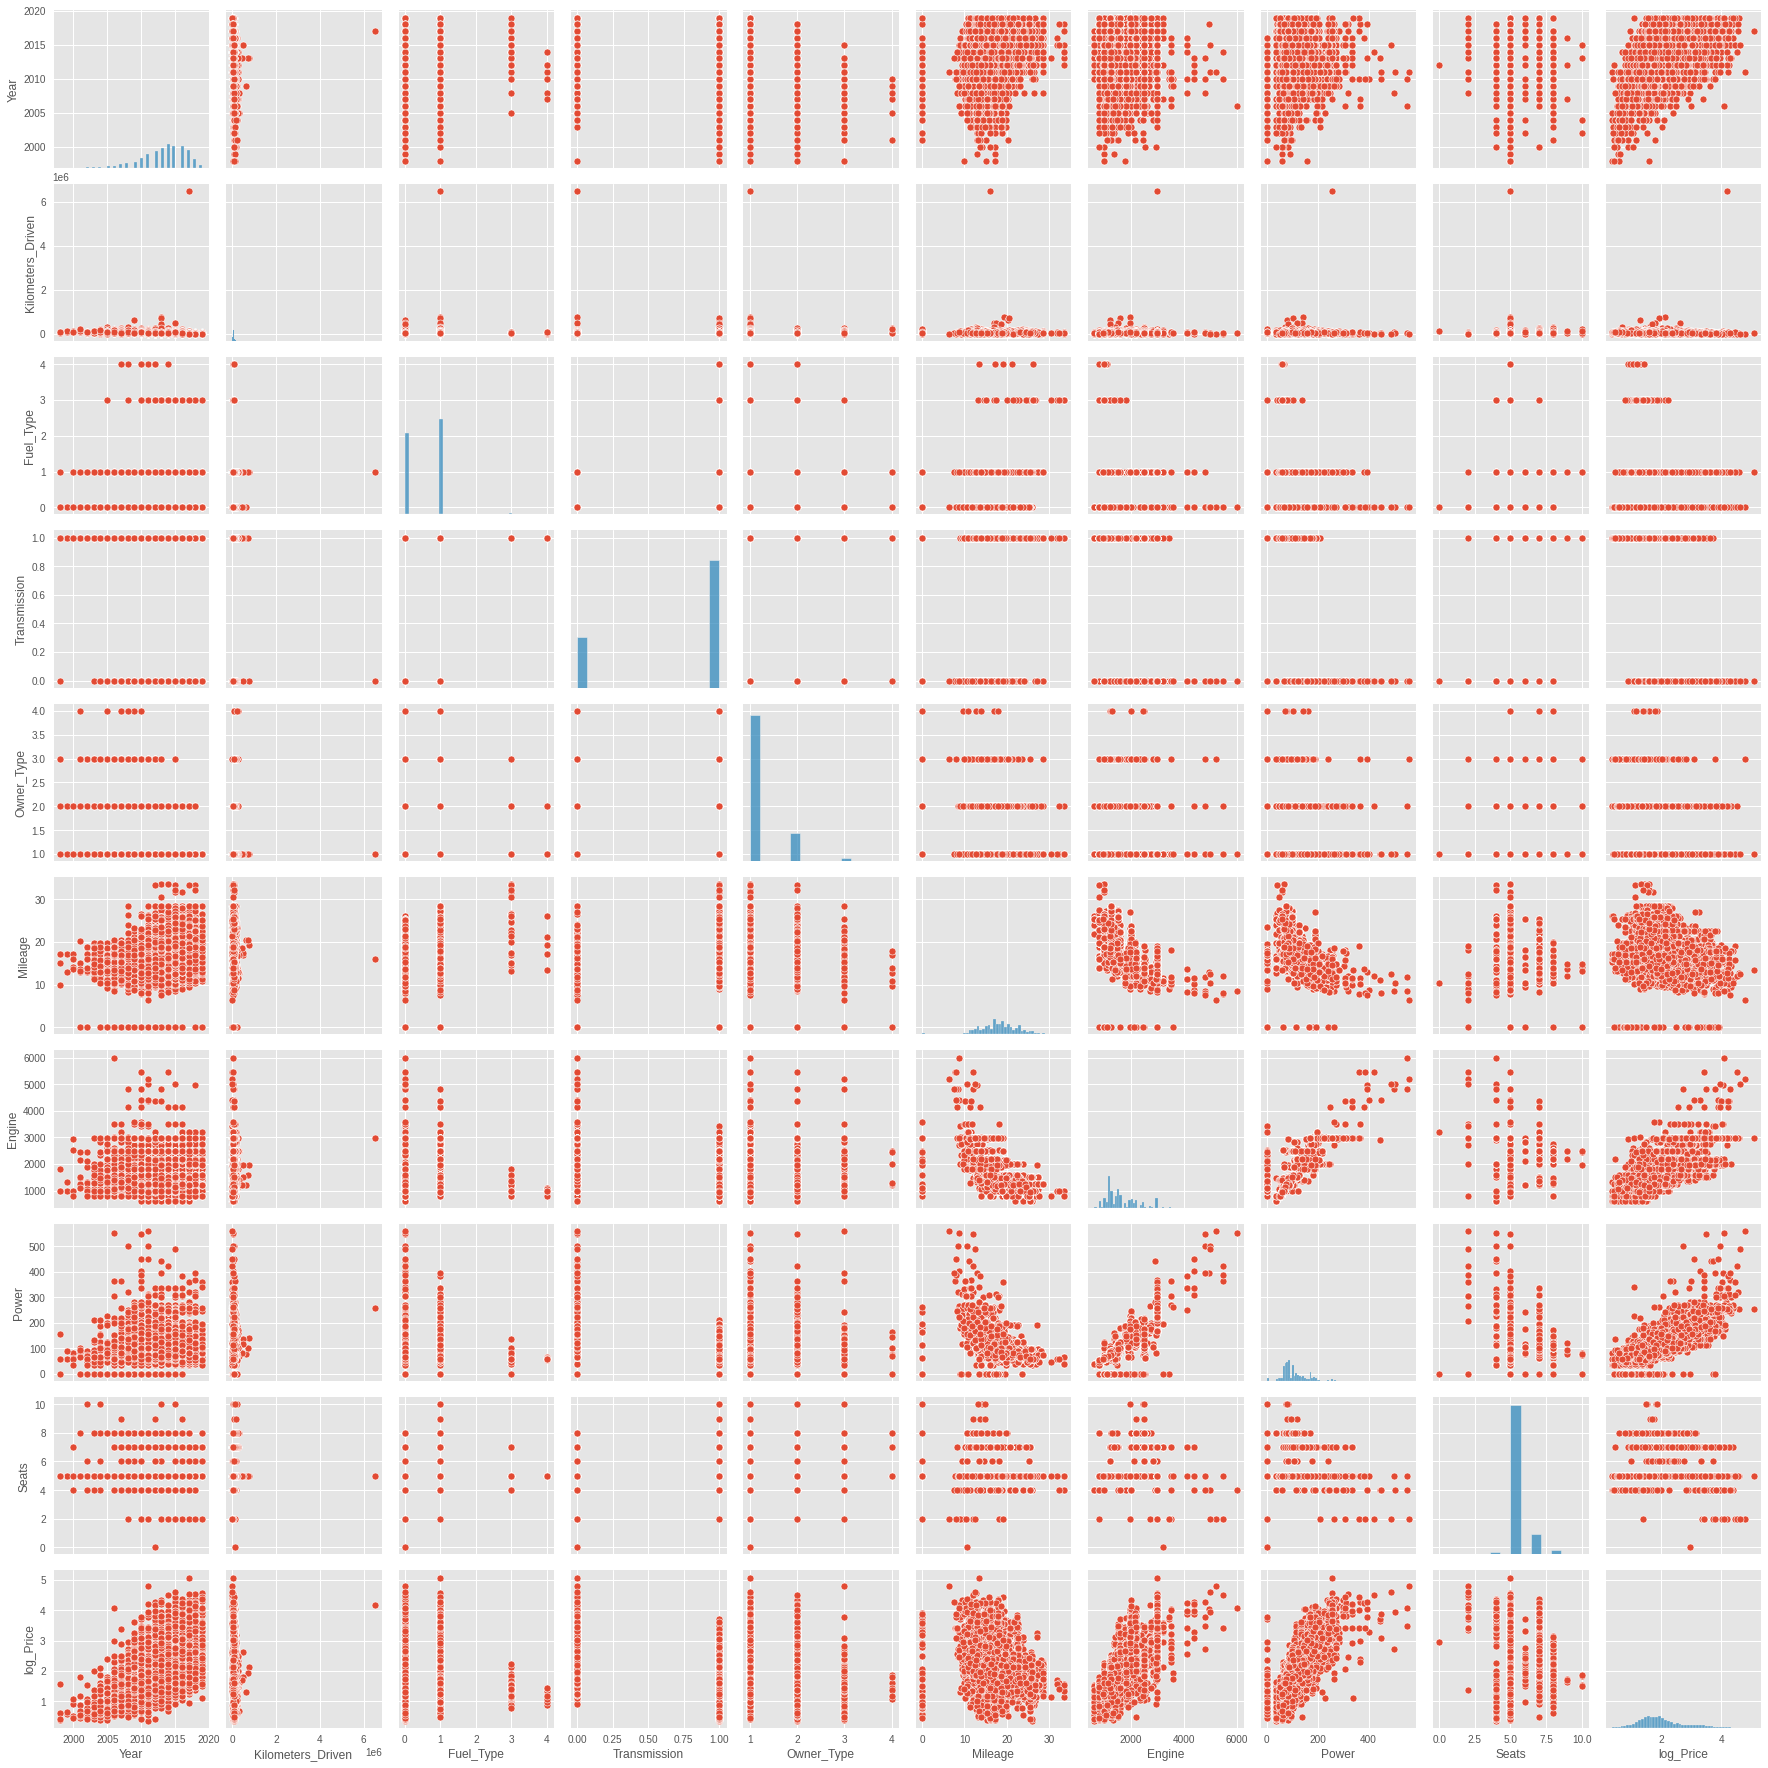

In [ ]:
# 회귀분석 기본 가정 검토 : 선형성 
sns.pairplot(data)

In [ ]:
data.corr()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,log_Price
Year,1.000000,-0.172663,0.106708,-0.095812,-0.394100,0.314417,-0.052538,0.069787,0.012338,0.472467
Kilometers_Driven,-0.172663,1.000000,0.090757,0.025870,0.084797,-0.064991,0.090832,0.024375,0.083101,-0.042856
Fuel_Type,0.106708,0.090757,1.000000,-0.082731,-0.037028,0.178504,0.320799,0.199438,0.252576,0.326801
Transmission,-0.095812,0.025870,-0.082731,1.000000,0.008939,0.342504,-0.501056,-0.635513,0.075325,-0.631667
Owner_Type,-0.394100,0.084797,-0.037028,0.008939,1.000000,-0.161366,0.051892,0.001548,0.014002,-0.180038
Mileage,0.314417,-0.064991,0.178504,0.342504,-0.161366,1.000000,-0.598638,-0.453399,-0.308226,-0.289048
Engine,-0.052538,0.090832,0.320799,-0.501056,0.051892,-0.598638,1.000000,0.842507,0.393435,0.701375
Power,0.069787,0.024375,0.199438,-0.635513,0.001548,-0.453399,0.842507,1.000000,0.108638,0.782920
Seats,0.012338,0.083101,0.252576,0.075325,0.014002,-0.308226,0.393435,0.108638,1.000000,0.155068
log_Price,0.472467,-0.042856,0.326801,-0.631667,-0.180038,-0.289048,0.701375,0.782920,0.155068,1.000000


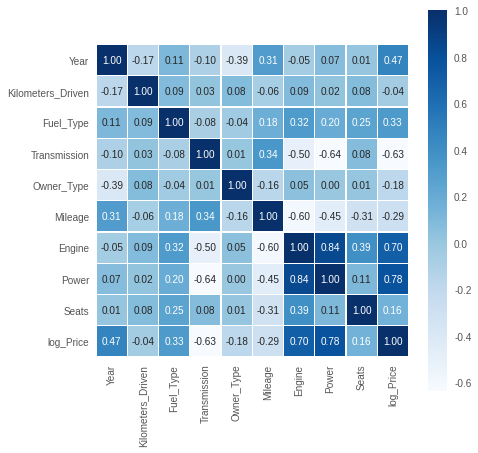

In [ ]:
# heatmap : correlation matrix 시각화 
plt.figure(figsize=(7,7))
sns.heatmap(data = data.corr(), annot=True, square=True,fmt = '.2f', linewidths=.3, cmap='Blues')

Engine과 Power가 높은 선형관계를 보이고 있다. 다중공선성 문제로 보인다. Engine factor를 삭제한다. 


In [ ]:
data.drop(['Engine'], axis='columns', inplace=True)

In [ ]:
data.corr()['log_Price'].sort_values(ascending=False)

log_Price            1.000000
Power                0.782920
Year                 0.472467
Fuel_Type            0.326801
Seats                0.155068
Kilometers_Driven   -0.042856
Owner_Type          -0.180038
Mileage             -0.289048
Transmission        -0.631667
Name: log_Price, dtype: float64

Power 변수의 영향력이 지나치게 커보인다. 포함시켜 분석한 결과와 배제한 결과를 후에 비교하도록 한다. 

# 3. 모델링

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso

from sklearn.metrics import mean_squared_error

In [ ]:
data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Power', 'Seats', 'log_Price'],
      dtype='object')

In [ ]:
cor = ['Year', 'Kilometers_Driven', 'Fuel_Type','Transmission', 'Owner_Type', 'Mileage', 'Power', 'Seats']

In [ ]:
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Power,Seats,log_Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,3,1,1,26.60,58.16,5.0,1.011601
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,1,1,1,19.67,126.20,5.0,2.602690
2,Honda Jazz V,Chennai,2011,46000,0,1,1,18.20,88.70,5.0,1.704748
3,Maruti Ertiga VDI,Chennai,2012,87000,1,1,1,20.77,88.76,7.0,1.945910
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,1,0,2,15.20,140.80,5.0,2.930660
...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,1,1,1,28.40,74.00,5.0,1.749200
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,1,1,1,24.40,71.00,5.0,1.609438
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,1,1,2,14.00,112.00,8.0,1.360977
6017,Maruti Wagon R VXI,Kolkata,2013,46000,0,1,1,18.90,67.10,5.0,1.294727


In [ ]:
# train test split
y = data['log_Price']
X = data[cor]

In [ ]:
y

0       1.011601
1       2.602690
2       1.704748
3       1.945910
4       2.930660
          ...   
6014    1.749200
6015    1.609438
6016    1.360977
6017    1.294727
6018    1.252763
Name: log_Price, Length: 5975, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## 3-1. LinearRegression

In [ ]:
# 모델 불러옴
model = LinearRegression()

# train data에 fit시킴
model.fit(X_train, y_train)

# predict
pred = model.predict(X_train)

In [ ]:
# fit된 모델의 R-square
model.score(X_train, y_train)

0.8483087420282485

In [ ]:
mean_squared_error(y_train, pred)

0.08616349379115452

In [ ]:
# test data R-square
model.score(X_test, y_test)

0.8450193283289386

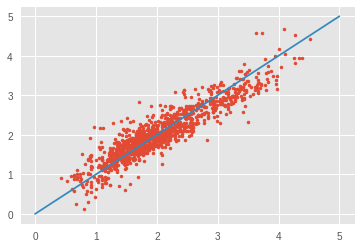

In [ ]:
# 예측 vs 실제 데이터 plot
plt.plot(y_test, model.predict(X_test), '.')

# 예측과 실제가 비슷하면, 라인상에 분포함
x = np.linspace(0, 5, 5)
y_h = x
plt.plot(x, y_h)
plt.show()

예측값은 아주 좋았다!

## 3-2. statsmodel

In [ ]:
import statsmodels.api as sm

In [ ]:
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:              log_Price   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                          2.118e+04
Date:                Fri, 29 Jan 2021   Prob (F-statistic):                        0.00
Time:                        13:51:14   Log-Likelihood:                         -2965.5
No. Observations:                5975   AIC:                                      5947.
Df Residuals:                    5967   BIC:                                      6001.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [ ]:
# p-value 값이 큰 s4 변수 제거해보기 

cor1 = ['Year', 'Kilometers_Driven', 'Fuel_Type','Transmission', 'Owner_Type', 'Mileage', 'Seats']
X2 = X[cor1]

model = sm.OLS(y, X2)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:              log_Price   R-squared (uncentered):                   0.945
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                          1.470e+04
Date:                Fri, 29 Jan 2021   Prob (F-statistic):                        0.00
Time:                        13:51:14   Log-Likelihood:                         -4389.5
No. Observations:                5975   AIC:                                      8793.
Df Residuals:                    5968   BIC:                                      8840.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

# 4. 회귀분석 가정 검토

In [ ]:
import scipy.stats

pred = result.predict()
residual = y - result.predict() 
sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)

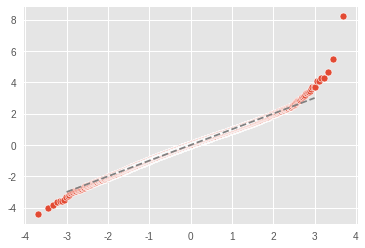

In [ ]:
# 잔차의 정규성 
sns.scatterplot(x, y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')

잔차가 직선의 형태를 아주 잘 따라가고 있으므로 정규성을 만족한다. 
마지막에 튀는 아이가 있다.

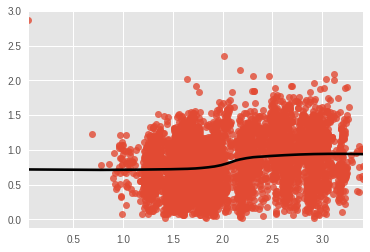

In [ ]:
# 잔차의 등분산성 
sns.regplot(pred, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'black'})

까만선이 거의 수평을 이루는 것을 보아 등분산성을 만족한다고 볼 수 있다. 